## Ejercicios

1) Levantar la base **Customer-Churn-Records.csv** que posee los siguientes campos:  
a) RowNumber: Correponde a la posición del registro en la base. No debería tener ningún efecto con el output  
b) CustomerId: Es el id del cliente.  
c) Surname: Apellido del cliente.  
d) CreditScore: Score crediticio del cliente.  
e) Geography: Locación del cliente.  
f) Gender: Género del cliente.  
g) Age: Edad del cliente.  
h) Tenure: Número de años que el cliente se encuentra relacionado al banco.  
i) Balance: Balance en las cuentas.  
j) NumOfProducts: Cantidad de productos que posee el cliente con el banco.  
k) HasCrCard: Si el cliente posee o no tarjeta de crédito.  
l) IsActiveMember: Si el cliente es un cliente activo, es decir, realiza transacciones con el banco.  
m) EstimatedSalary: Salario estimado del cliente.  
n) Exited: (Target de la base) Indica si el cliente se dio de baja o no.  
o) Complain: Si el cliente tiene quejas o no.  
p) Satisfaction Score: Score de satisfacción del cliente.  
q) Card Type: Tipo de tarjeta de crédito que posee el cliente.  
r) Points Earned: Puntos ganados por los clientes usando su tarjeta de crédito.  


2) Realizar una descripción de la base levantada. ¿Existen variables que sean categóricas? Si es así ¿pueden ser usadas en un modelo?  
3) Realizar una separación de la base en un 70% para entrenar y un 30% para validar.  
4) Crear un árbol de decisión de clasificación con todos sus hiperparámetros por defecto.  
5) Qué *accuracy* posee el modelo creado en el punto 4).  
6) Modificar el parámetro max_depth a 3. ¿El *accuracy* de este modelo es mejor o peor que el obtenido en el punto 5)?.  
7) Graficar el árbol creado en el punto 6).  
8) Cuál es la variable por la que el modelo del punto 6) cortó primero? (Primera Variable del Árbol).  

### Puntos Extras ###
9) Construir la curva ROC del modelo creado en el punto 6)  
10) Crear un modelo cambiando algún hiperparámetro que se desee que de un mayor valor de *accuracy* que en el punto 6).

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Ejercicio 1 

In [3]:
data = pd.read_csv("./Data/Customer-Churn-Records.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Ejercicio 2

In [5]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Existen columnas categóricas (string). No sirven para armar modelos, hay que realizar transformaciones en las variables

In [7]:
data = data.join(pd.get_dummies(data["Card Type"]).astype(int))
data["Gender"] = np.where(data.Gender == "Female", 1, 0)
geography = data.groupby(["Geography", "Exited"]).size().to_frame("q").reset_index()
geography = pd.crosstab(geography.Geography, geography.Exited, geography.q, aggfunc="sum")
geography["pc_geography"] = geography[1] / (geography[0]+geography[1])
data = pd.merge(data, geography["pc_geography"], how="inner", on = "Geography")
data = data.drop(columns=["Geography", "Card Type"])

In [11]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Gender                  int32
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
DIAMOND                 int32
GOLD                    int32
PLATINUM                int32
SILVER                  int32
pc_geography          float64
dtype: object

### Ejercicio 3

In [12]:
X = data.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = data.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Ejercicio 4

In [13]:
treeModel = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Ejercicio 5

In [14]:
y_pred = treeModel.predict_proba(X_test)[:,-1]
accuracy_score(y_test, y_pred > 0.5)

0.9973333333333333

### Ejercicio 6

In [15]:
treeModel = tree.DecisionTreeClassifier(max_depth = 3 ).fit(X_train, y_train)
y_pred = treeModel.predict_proba(X_test)[:,-1]
accuracy_score(y_test, y_pred > 0.5)

0.998

Mejora un poco el resultado

### Ejercicio 7

[Text(0.4230769230769231, 0.875, 'Complain <= 0.5\ngini = 0.321\nsamples = 7000\nvalue = [5597, 1403]\nclass = No Exited'),
 Text(0.15384615384615385, 0.625, 'EstimatedSalary <= 191604.32\ngini = 0.0\nsamples = 5591\nvalue = [5590, 1]\nclass = No Exited'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 5344\nvalue = [5344, 0]\nclass = No Exited'),
 Text(0.23076923076923078, 0.375, 'EstimatedSalary <= 191618.406\ngini = 0.008\nsamples = 247\nvalue = [246, 1]\nclass = No Exited'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Exited'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 246\nvalue = [246, 0]\nclass = No Exited'),
 Text(0.6923076923076923, 0.625, 'Age <= 36.5\ngini = 0.01\nsamples = 1409\nvalue = [7, 1402]\nclass = Exited'),
 Text(0.5384615384615384, 0.375, 'NumOfProducts <= 1.5\ngini = 0.042\nsamples = 283\nvalue = [6, 277]\nclass = Exited'),
 Text(0.46153846153846156, 0.125, 'gini = 0.01\nsamples = 195\nvalue = [1, 194

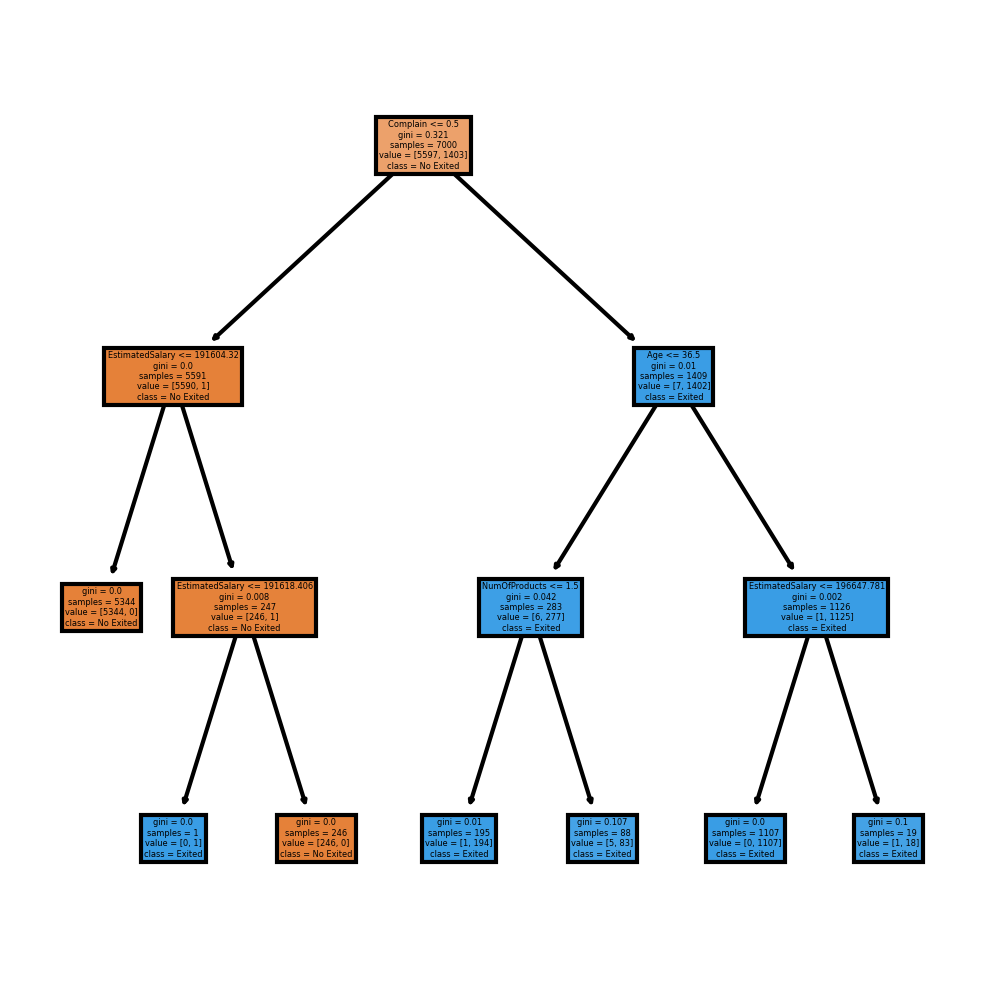

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(treeModel,
               feature_names = X_train.columns, 
               class_names=["No Exited", "Exited"],
               filled = True)

### Ejercicio 8
La primera variable que corta es complain